# Screening Results Exploration

Visualize screening metrics from `outputs/screening_results_20251122_113459.csv`.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
project_root = Path.cwd().resolve()
if project_root.name == "notebooks":
    project_root = project_root.parent

os.chdir(project_root)
print(f"Project root: {project_root}")

RESULT_PATH = project_root / "outputs/screening/screening_results_20251122_113459.csv"
print("Using result path:", RESULT_PATH)

df = pd.read_csv(RESULT_PATH)
print(f"Shape: {df.shape}")
df.head()

Project root: /m/home/home3/33/lil14/data/Documents/Project/LLMImputation_ResearchMethodology
Using result path: /m/home/home3/33/lil14/data/Documents/Project/LLMImputation_ResearchMethodology/outputs/screening/screening_results_20251122_113459.csv
Shape: (25, 8)


,experiment_id,split,mechanism,imputer,missing_rate,macro_f1,roc_auc,dp_diff
0,train|original|baseline|00,train,original,baseline,0,0.396792,0.730223,0.154180
1,train|mar|knn|05,train,mar,knn,5,0.428744,0.745046,0.191234
2,train|mar|knn|15,train,mar,knn,15,0.478434,0.772395,0.216693
3,train|mar|knn|30,train,mar,knn,30,0.546700,0.818849,0.157323
4,train|mar|simple_most_frequent|05,train,mar,simple_most_frequent,5,0.394938,0.723961,0.205774


In [12]:
best_per_imputer = (df.sort_values('macro_f1', ascending=False).groupby('imputer').head(1).reset_index(drop=True))
best_per_imputer

,experiment_id,split,mechanism,imputer,missing_rate,macro_f1,roc_auc,dp_diff
0,train|mar|knn|30,train,mar,knn,30,0.546700,0.818849,0.157323
1,train|mar|llm|05,train,mar,llm,5,0.400160,0.723896,0.213648
2,train|original|baseline|00,train,original,baseline,0,0.396792,0.730223,0.154180
3,train|mar|simple_most_frequent|05,train,mar,simple_most_frequent,5,0.394938,0.723961,0.205774
4,train|mar|simple_placeholder|05,train,mar,simple_placeholder,5,0.394910,0.723548,0.205265


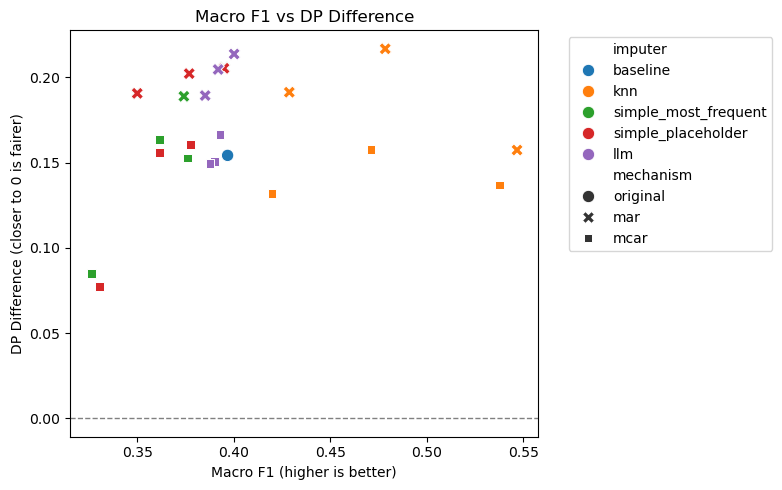

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='macro_f1', y='dp_diff', hue='imputer', style='mechanism', s=80)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Macro F1 vs DP Difference')
plt.xlabel('Macro F1 (higher is better)')
plt.ylabel('DP Difference (closer to 0 is fairer)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

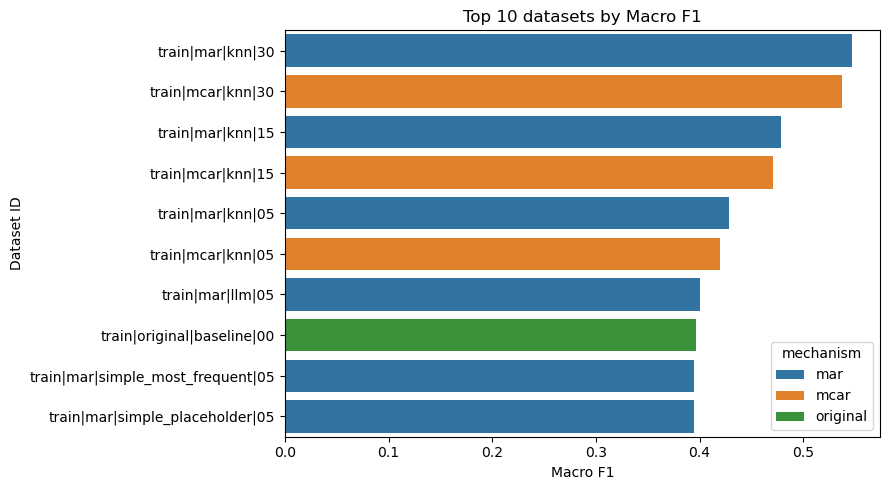

In [15]:
top10 = df.sort_values('macro_f1', ascending=False).head(10)
plt.figure(figsize=(9,5))
sns.barplot(data=top10, x='macro_f1', y='experiment_id', hue='mechanism', dodge=False)
plt.title('Top 10 datasets by Macro F1')
plt.xlabel('Macro F1')
plt.ylabel('Dataset ID')
plt.tight_layout()
plt.show()

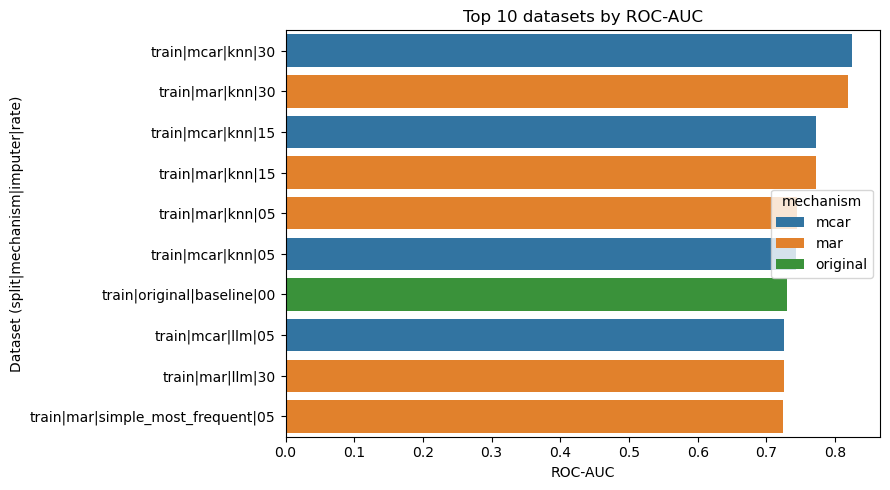

In [16]:
top10_roc = df.sort_values('roc_auc', ascending=False).head(10)
plt.figure(figsize=(9, 5))
sns.barplot(data=top10_roc, x='roc_auc', y='experiment_id', hue='mechanism', dodge=False)
plt.title('Top 10 datasets by ROC-AUC')
plt.xlabel('ROC-AUC')
plt.ylabel('Dataset (split|mechanism|imputer|rate)')
plt.tight_layout()
plt.show()

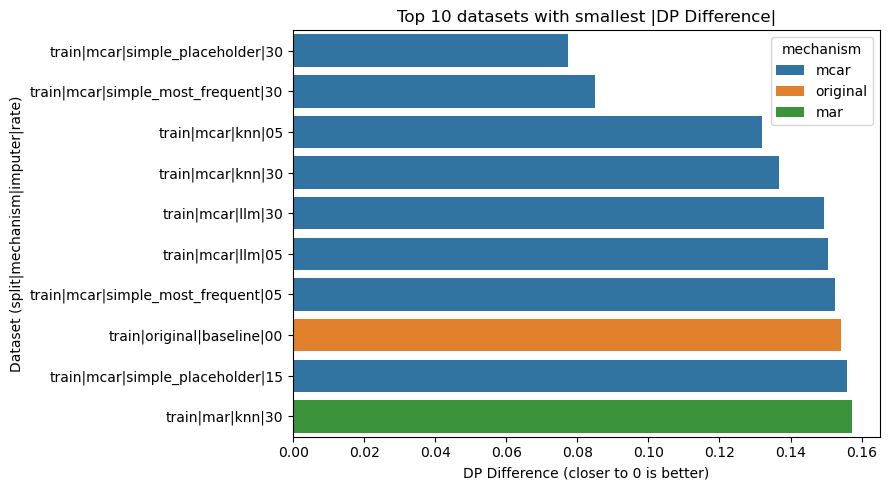

In [18]:
top10_dp = df.reindex(df['dp_diff'].abs().sort_values().index).head(10)
plt.figure(figsize=(9, 5))
sns.barplot(data=top10_dp, x='dp_diff', y='experiment_id', hue='mechanism', dodge=False)
plt.title('Top 10 datasets with smallest |DP Difference|')
plt.xlabel('DP Difference (closer to 0 is better)')
plt.ylabel('Dataset (split|mechanism|imputer|rate)')
plt.tight_layout()
plt.show()

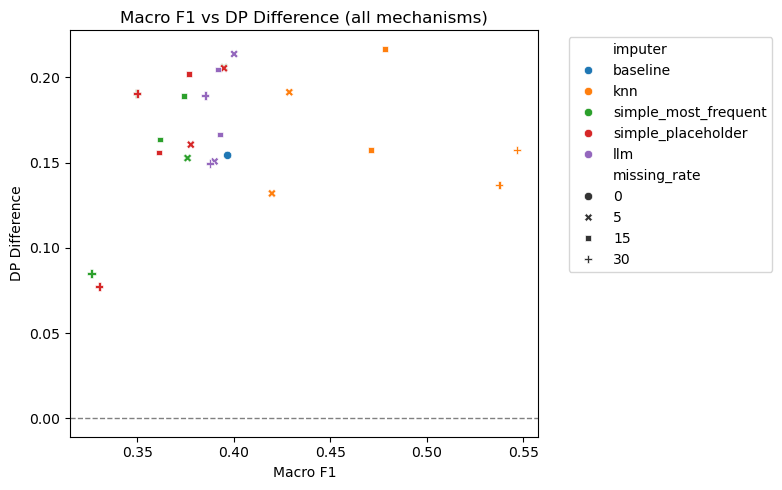

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='macro_f1', y='dp_diff', hue='imputer',
                style='missing_rate', palette='tab10')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Macro F1 vs DP Difference (all mechanisms)')
plt.xlabel('Macro F1')
plt.ylabel('DP Difference')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

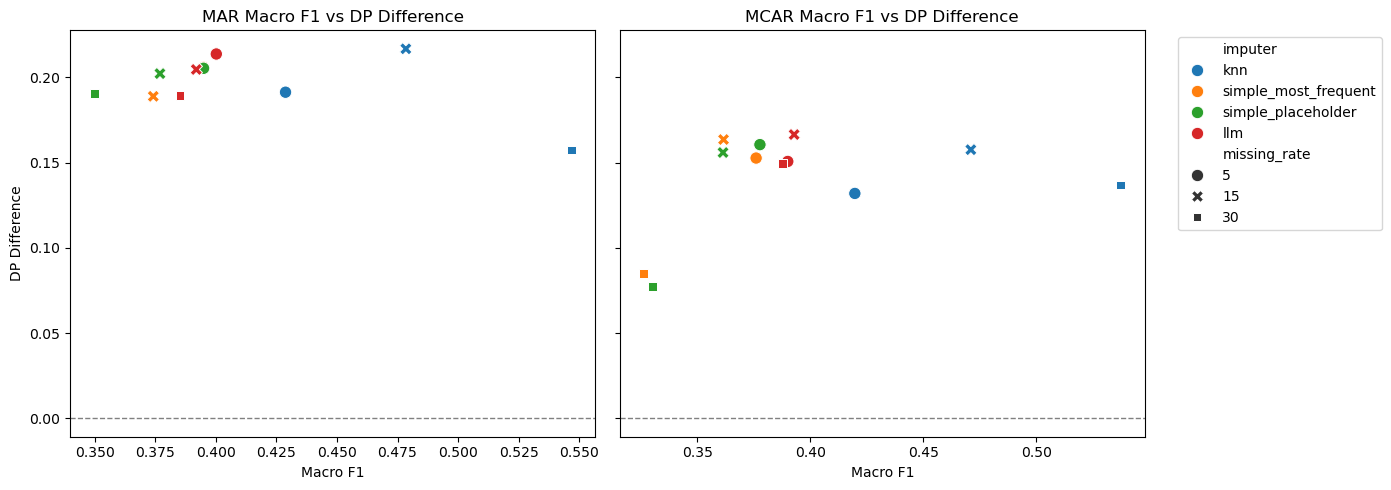

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, mech in zip(axes, ['mar', 'mcar']):
    subset = df[df['mechanism'].str.lower() == mech]
    sns.scatterplot(data=subset, x='macro_f1', y='dp_diff',
                    hue='imputer', style='missing_rate', s=80, ax=ax)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f'{mech.upper()} Macro F1 vs DP Difference')
    ax.set_xlabel('Macro F1')
    ax.set_ylabel('DP Difference')
    ax.legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

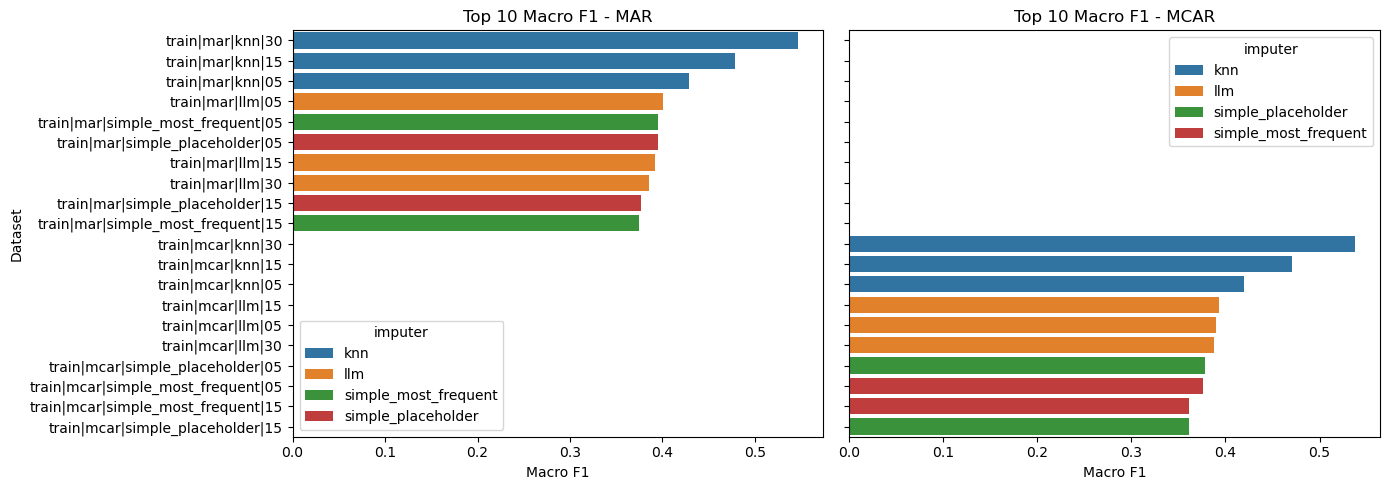

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, mech in zip(axes, ['mar', 'mcar']):
    subset = df[df['mechanism'].str.lower() == mech]
    top10 = subset.sort_values('macro_f1', ascending=False).head(10)
    sns.barplot(data=top10, x='macro_f1', y='experiment_id',
                hue='imputer', ax=ax, dodge=False)
    ax.set_title(f'Top 10 Macro F1 - {mech.upper()}')
    ax.set_xlabel('Macro F1')
    ax.set_ylabel('Dataset')
plt.tight_layout()
plt.show()